# Step 1: Exploratory Data Analysis

## A: Load the Necessary Libraries & Files

These files are from the [e-Commerce (Target) Sales Dataset](https://www.kaggle.com/datasets/devarajv88/target-dataset?select=geolocation.csv) on Kaggle

In [88]:
# import the pandas library 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# create dataframes
customers_df = pd.read_csv('customers.csv')
geolocation_df = pd.read_csv('geolocation.csv')
order_items_df = pd.read_csv('order_items.csv')
orders_df = pd.read_csv('orders.csv')
payments_df = pd.read_csv('payments.csv')
products_df = pd.read_csv('products.csv')
sellers_df = pd.read_csv('sellers.csv')

## B: Get to Know the Data

### i. The customers table

In [ ]:
# I like to use a .head() first to get an idea for what columns are in the table and what kind of data is in each.
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [8]:
# I also like to run a .shape to see just how large the table is, overall. 
customers_df.shape

(99441, 5)

In [10]:
# How many unique customer states are there? 
customers_df['customer_state'].nunique()

27

In [11]:
# What are their names? 
customers_df['customer_state'].unique()

array(['SP', 'SC', 'MG', 'PR', 'RJ', 'RS', 'PA', 'GO', 'ES', 'BA', 'MA',
       'MS', 'CE', 'DF', 'RN', 'PE', 'MT', 'AM', 'AP', 'AL', 'RO', 'PB',
       'TO', 'PI', 'AC', 'SE', 'RR'], dtype=object)

In [12]:
# How many unique customer cities are there?
customers_df['customer_city'].nunique()

4119

#### Takeaways: 
* The customer_id and customer_unique_id columns look like... a lot.  They still may be able to be used as foriegn keys. 
* The customer_zip, customer_city, and customer_state columns may also serve as foriegn keys.  Let's see! 

### ii. The geolocation table

In [13]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [14]:
geolocation_df.shape

(1000163, 5)

#### Takeaways:
* It looks like zip_code_prefix, city, and state should all be able to be used for joins to the customers table!

### iii. the order_items table

In [15]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
order_items_df.shape 

(112650, 7)

In [ ]:
# Is the shipping_limit_date column in usable datetime format?
print(order_items_df['shipping_limit_date'].dtype)

# Apparently not.

object


#### Takeaways:
* I assume there will be potential joins on order_id, order_item_id, product_id, and seller_id.
* The shipping_limit_date column needs to be converted to a datetime format in order to be used.

### iv. The orders table

In [68]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [69]:
orders_df.shape

(99441, 8)

In [70]:
# Are order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date,
# and order_estimated_delivery_date in usable datetime format?
print(orders_df['order_purchase_timestamp'].dtype)
print(orders_df['order_approved_at'].dtype)
print(orders_df['order_delivered_carrier_date'].dtype)
print(orders_df['order_delivered_customer_date'].dtype)
print(orders_df['order_estimated_delivery_date'].dtype)

# It appears all of these columns need to be cleaned into a usable datetime format. 

object
object
object
object
object


#### Takeaways:
* It looks like joins on order_id will be possible between order_items and this table. 
* It looks like all of the columns containing date and time information need to be reformatted from an object datatype into a usable datetime datatype.

### v. The payments table.

In [27]:
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [28]:
payments_df.shape

(103886, 5)

In [ ]:
# Are there any values other than '1' in the payment_sequential column?
payments_df['payment_sequential'].nunique()

# Apparently, yes. 

29

In [ ]:
# What are the unique values in the payment_sequential column? 
payments_df['payment_sequential'].unique()

# Apparently this column tracks the order of installments in an Equated Monthly Installments program.  Could be relevant. 

array([ 1,  2,  4,  5,  3,  8,  6,  7, 10, 11, 17, 19, 27, 12,  9, 15, 13,
       14, 16, 25, 22, 26, 29, 28, 18, 21, 24, 23, 20])

In [ ]:
# Are there any payment types other than 'credit card' in the payment_type column?
payments_df['payment_type'].nunique()

# Apparently, yes.

5

In [ ]:
# What are all the payment types?
payments_df['payment_type'].unique()

# Apparently, UPI stands for Unified Payments Interface (i.e. Google Pay).

array(['credit_card', 'UPI', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

#### Takeaways: 
* We have another potential join on order_id here.
* I think great insights could be gleaned from the payment_type and payment_installments columns, paritcularly when this table is joined with others. 

### vi. The products table

In [33]:
products_df.head()

,product_id,product category,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sport leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,babies,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#### Takeaways:
* This is the first table that strikes me as really potentially having columns that could stand to be dropped.  size, weight, and number of photos of a product seem like they *could* produce interesting insights, or *could* be comepletely irrelevant.  I think it really comes down to the business issue. 
* product_category, on the other hand, seems like it could lead to some very insightful visualizations. 
* product_id can serve as a foreign key from this table to the order_items table, and then from there to many other tables via order_id.  That could lead to some really cool joining possibilities! 

### vii. The sellers table

In [ ]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


#### Takeaways:
* Can use the seller_id column to move from this to order_items and then from there to products via product_id or any number of other tables via order_id.  Using order_id can even evntually get you to the customers table via customer_id that exists in some tables with order_id.  Lots of possibilities! 
* It would be interesting to compare seller_zip_code, seller_city, and/or seller_state to the customer verions of those same columns, to see how far products tend to be sold from their final delivery destination.  Could perhaps get some financial data in alongside that by joining to the payments table. 

## C. Visualize

### i. The customers table

In [ ]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
# Calculate the occurrances of each customer_state

state_counts = customers_df['customer_state'].value_counts()
print(state_counts)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64


Text(0, 0.5, 'Count')

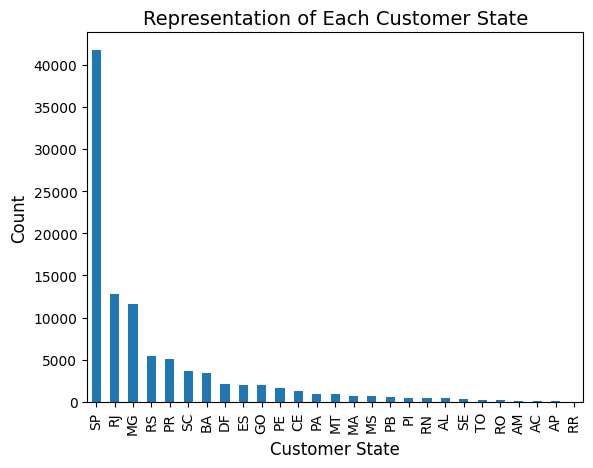

In [ ]:
# Plot the occurances of each customer_state 

state_counts.plot(kind='bar')
plt.title('Number of Customers by State', fontsize=14)
plt.xlabel('Customer State', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

### ii. The geolocation table

In [41]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


Text(0, 0.5, 'Latitude')

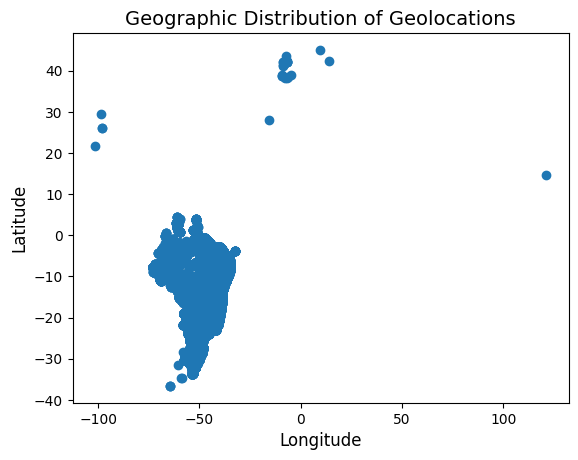

In [54]:
# Plot the geolocation data on a scatterplot to visualize approximate geolocation density. 

plt.scatter(geolocation_df['geolocation_lng'], geolocation_df['geolocation_lat'])
plt.title('Geographic Distribution of Geolocations', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

### iii. The order_items table

In [ ]:
order_items_df.head()



,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


(array([17167., 17348., 17532., 17713., 17897., 18078., 18262.]),
 [Text(17167.0, 0, '2017-01'),
  Text(17348.0, 0, '2017-07'),
  Text(17532.0, 0, '2018-01'),
  Text(17713.0, 0, '2018-07'),
  Text(17897.0, 0, '2019-01'),
  Text(18078.0, 0, '2019-07'),
  Text(18262.0, 0, '2020-01')])

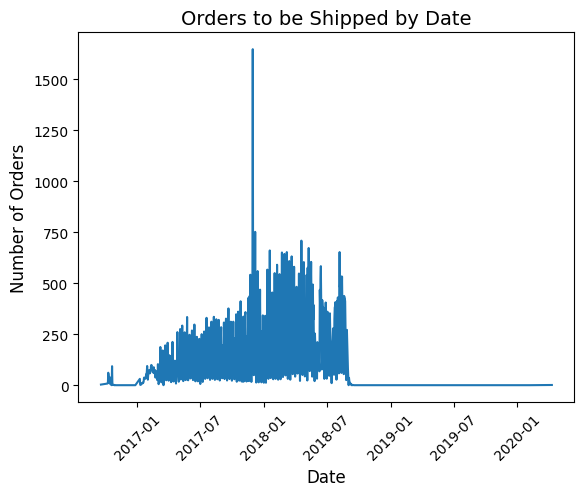

In [ ]:
# Visualize how many orders must be shipped by a certain date

# Make sure shipping_limit_date is in usable datetime format
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'], errors='coerce')

# Extract the date portion of the datetime
order_items_df['shipping_limit_date'] = order_items_df['shipping_limit_date'].dt.date

# Group by order date and count the number of elements in each group
shipping_counts = order_items_df.groupby('shipping_limit_date').size()

# Plot the data
shipping_counts.plot(kind='line')
plt.title('Orders to be Shipped by Date', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45)


## iv. The orders table

In [71]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Text(0, 0.5, 'Number of Orders')

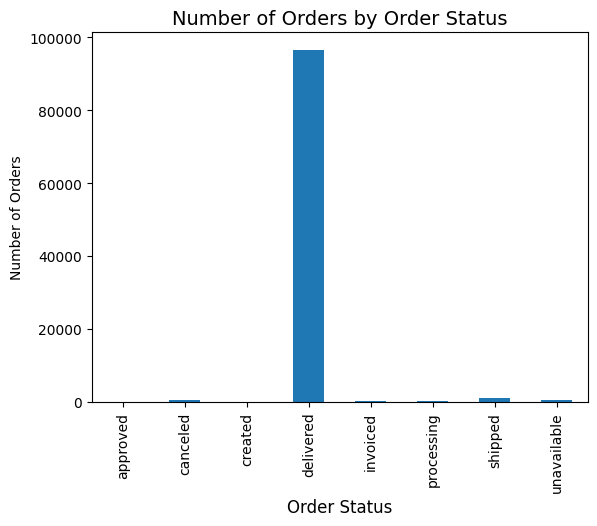

In [74]:
# Visualize how many orders are of each order_status

# Group by order_status and count the number of elements in each group
order_status_counts = orders_df.groupby('order_status').size()

# Plot the data
order_status_counts.plot(kind='bar')
plt.title('Number of Orders by Order Status', fontsize=14)
plt.xlabel('Order Status', fontsize=12)
plt.ylabel('Number of Orders')

### v. The payments table

In [75]:
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'UPI'),
  Text(1, 0, 'credit_card'),
  Text(2, 0, 'debit_card'),
  Text(3, 0, 'not_defined'),
  Text(4, 0, 'voucher')])

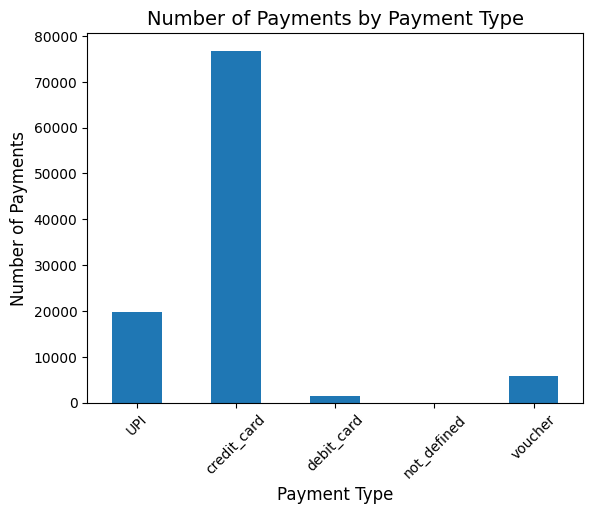

In [78]:
# Let's see what's the most common number of payment_type

# Group by the payment_type and count the number of elements in each group
payment_type_counts = payments_df.groupby('payment_type').size()

# Plot the data
payment_type_counts.plot(kind='bar')
plt.title('Number of Payments by Payment Type', fontsize=14)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Number of Payments', fontsize=12)
plt.xticks(rotation=45)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24')])

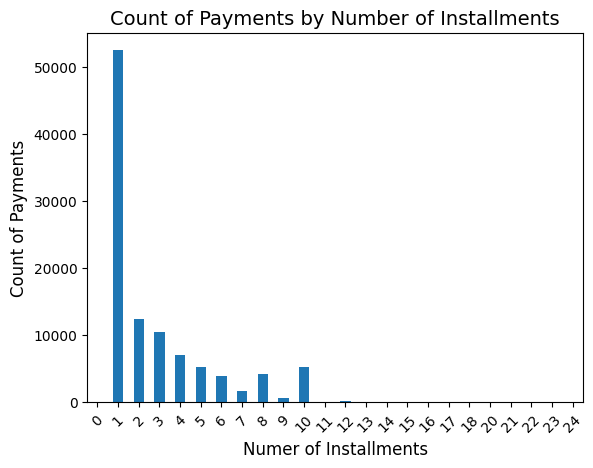

In [ ]:
# Let's see what's the most common number of payment_installments

# Group by the payment_type and count the number of elements in each group
payment_installment_counts = payments_df.groupby('payment_installments').size()

# Plot the data
payment_installment_counts.plot(kind='bar')
plt.title('Count of Payments by Number of Installments', fontsize=14)
plt.xlabel('Numer of Installments', fontsize=12)
plt.ylabel('Count of Payments', fontsize=12)
plt.xticks(rotation=45)

### vi. The products table

In [80]:
products_df.head()

,product_id,product category,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sport leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,babies,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Text(0, 0.5, 'Number of Products')

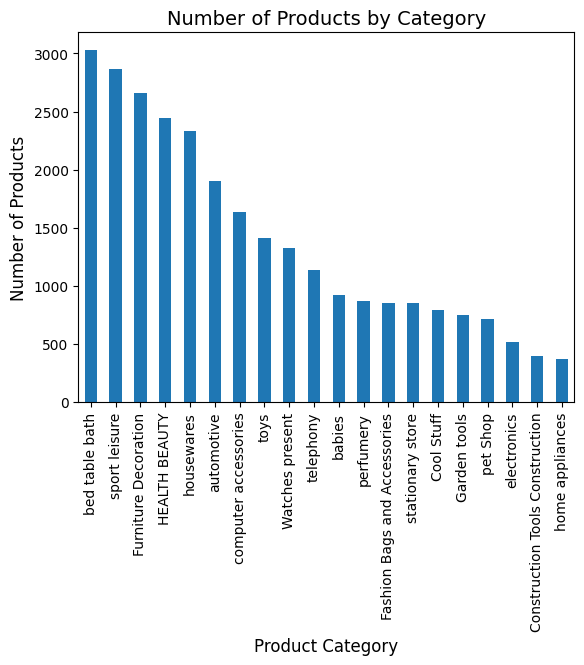

In [86]:
# Let's see how many products are in each category

# Group by product_category and count the number of elements in each group
product_category_counts = products_df.groupby('product category').size()

# Limit to the top 20 most-represented categories
top_20_categories = product_category_counts.nlargest(20)

# Plot the data
top_20_categories.plot(kind='bar')
plt.title('Number of Products by Category', fontsize=14)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)


### vii. The sellers table

In [89]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
MA       1
AM       1
PA       1
Name: count, dtype: int64


Text(0, 0.5, 'Count')

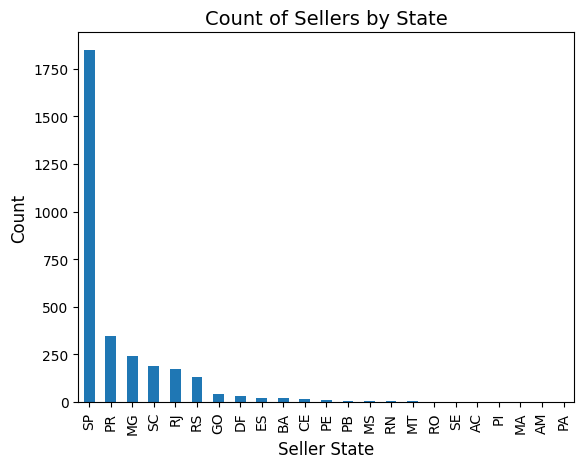

In [91]:
# Calculate the number of sellers by state
state_counts = sellers_df['seller_state'].value_counts()
print(state_counts)

# Plot the data
state_counts.plot(kind='bar')
plt.title('Count of Sellers by State', fontsize=14)
plt.xlabel('Seller State', fontsize=12)
plt.ylabel('Count', fontsize=12)